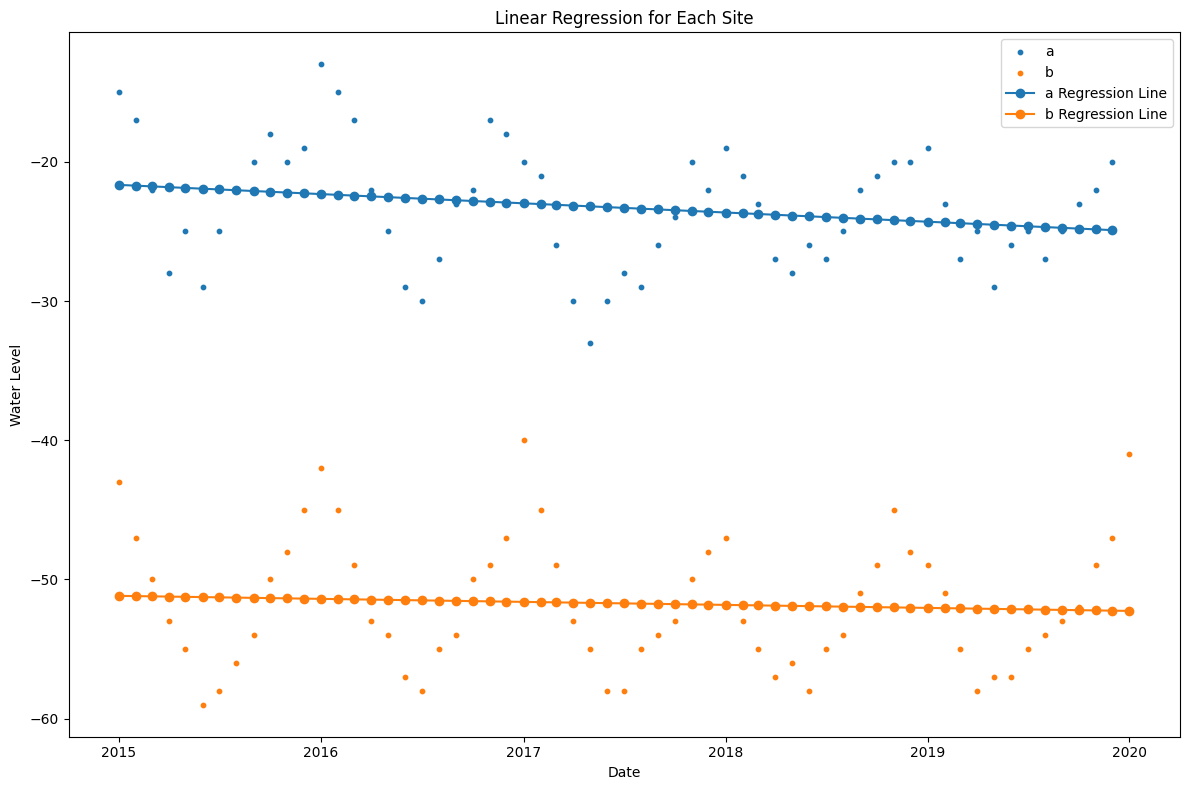

In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('Fake.csv', sep=';')

# Step 2: Data Preprocessing
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')  # Corrected date format
# Step 2: Data Preprocessing
#df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Step 3: Check and convert the 'level' column to a numeric data type
df['level'] = pd.to_numeric(df['level'], errors='coerce')

# Step 4: Create a list to store the regression models
regression_models = []

# Step 5: Conduct Linear Regression for each site
sites = df['site'].unique()

for site in sites:
    site_data = df[df['site'] == site]
    X = sm.add_constant(site_data['date'].map(pd.Timestamp.toordinal))
    y = site_data['level']
    model = sm.OLS(y, X).fit()
    regression_models.append(model)

# Step 6: Plot all regression lines on one graph
plt.figure(figsize=(12, 8))

# Scatter plot of data points for each site
for site in sites:
    site_data = df[df['site'] == site]
    plt.scatter(site_data['date'], site_data['level'], label=site, s=10)

# Plot regression lines for each site with 'o' marker style for disconnected lines
for i, model in enumerate(regression_models):
    site_data = df[df['site'] == sites[i]]
    plt.plot(site_data['date'], model.fittedvalues, marker='o', linestyle='-', label=f'{sites[i]} Regression Line')

plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Linear Regression for Each Site')
plt.legend()
plt.tight_layout()
plt.show()
